In [1]:
    import numpy as np
    import pandas as pd
    from keras.layers import Dense, LSTM
    import matplotlib.pyplot as plt
    import tensorflow as tf

In [2]:
    data_train = pd.read_csv('austin_weather_new.csv')
    data_train.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,"Rain , Thunderstorm"
2,12/23/2013,58,45,32,31,27,23,76,52,27,"Rain , Thunderstorm"
3,12/24/2013,61,46,31,36,28,21,89,56,22,"Rain , Thunderstorm"
4,12/25/2013,58,50,41,44,40,36,86,71,56,Rain


In [21]:
len(data_train)
data_train.shape[0]
len(data_train.index)

1319

In [3]:
data_train.dtypes

Date                   object
TempHighF               int64
TempAvgF                int64
TempLowF                int64
DewPointHighF           int64
DewPointAvgF            int64
DewPointLowF            int64
HumidityHighPercent     int64
HumidityAvgPercent      int64
HumidityLowPercent      int64
Events                 object
dtype: object

In [4]:
data_train['TempHighF'] = data_train.TempHighF.astype(float)
data_train['TempAvgF'] = data_train.TempAvgF.astype(float)
data_train['TempLowF'] = data_train.TempLowF.astype(float)
data_train['DewPointHighF'] = data_train.DewPointHighF.astype(float)
data_train['DewPointAvgF'] = data_train.DewPointAvgF.astype(float)
data_train['DewPointLowF'] = data_train.DewPointLowF.astype(float)
data_train['HumidityHighPercent'] = data_train.HumidityHighPercent.astype(float)
data_train['HumidityAvgPercent'] = data_train.HumidityAvgPercent.astype(float)
data_train['HumidityLowPercent'] = data_train.HumidityLowPercent.astype(float)
data_train.dtypes

Date                    object
TempHighF              float64
TempAvgF               float64
TempLowF               float64
DewPointHighF          float64
DewPointAvgF           float64
DewPointLowF           float64
HumidityHighPercent    float64
HumidityAvgPercent     float64
HumidityLowPercent     float64
Events                  object
dtype: object

In [5]:
data_train.isnull().sum()

Date                   0
TempHighF              0
TempAvgF               0
TempLowF               0
DewPointHighF          0
DewPointAvgF           0
DewPointLowF           0
HumidityHighPercent    0
HumidityAvgPercent     0
HumidityLowPercent     0
Events                 0
dtype: int64

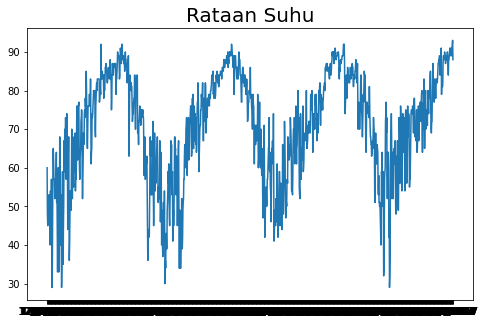

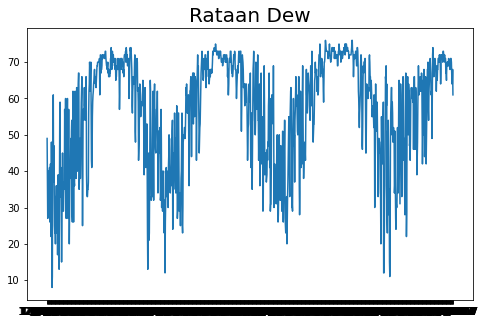

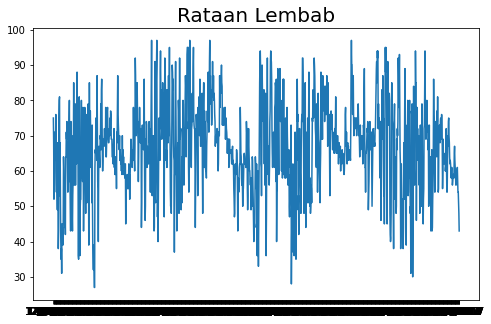

In [18]:
    dates = data_train['Date'].values
    temp  = data_train['TempAvgF'].values
    dew  = data_train['DewPointAvgF'].values 
    hum  = data_train['HumidityAvgPercent'].values
    
    plt.figure(figsize=(8,5))
    plt.plot(dates, temp)
    plt.title('Rataan Suhu',
              fontsize=20);

    plt.figure(figsize=(8,5))
    plt.plot(dates, dew)
    plt.title('Rataan Dew',
              fontsize=20);

    plt.figure(figsize=(8,5))
    plt.plot(dates, hum)
    plt.title('Rataan Lembab',
              fontsize=20);

In [7]:
    def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
        series = tf.expand_dims(series, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(window_size + 1))
        ds = ds.shuffle(shuffle_buffer)
        ds = ds.map(lambda w: (w[:-1], w[1:]))
        return ds.batch(batch_size).prefetch(1)

**Model sequential dan Learning Rate pada Optimizer**

In [8]:
    train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
    model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(60, return_sequences=True),
      tf.keras.layers.LSTM(60),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1),
    ])

**Training MAE**

In [9]:
    optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer = optimizer,
                  metrics=["mae"])
    history = model.fit(train_set,epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13/13 [==============================] - 1s 87ms/step - loss: 70.0218 - mae: 70.5218
Epoch 2/100
13/13 [==============================] - 1s 83ms/step - loss: 69.8981 - mae: 70.3981
Epoch 3/100
13/13 [==============================] - 1s 83ms/step - loss: 69.6381 - mae: 70.1381
Epoch 4/100
13/13 [==============================] - 1s 84ms/step - loss: 69.2972 - mae: 69.7972
Epoch 5/100
13/13 [==============================] - 1s 82ms/step - loss: 68.9454 - mae: 69.4454
Epoch 6/100
13/13 [====